In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
pwd

'c:\\Users\\SPPL IT\\Desktop\\Study\\Guided Projects\\Youtube'

In [111]:
df=pd.read_csv("Zomato data .csv")

In [112]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


##  Data Preprocessing

In [113]:
## Converting the datas of "rate" col 
df["rate"] = df["rate"].str.replace("/5",'', regex=False)

In [6]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [7]:
## Checking Missing Values 
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

## 1. What type of restaurant do the majority of customers order from ?

### Types of restaurant

In [4]:
df["listed_in(type)"].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

C:\Users\SPPL IT\AppData\Local\Temp\ipykernel_15216\3519919210.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="listed_in(type)", palette="Set3",edgecolor="black")


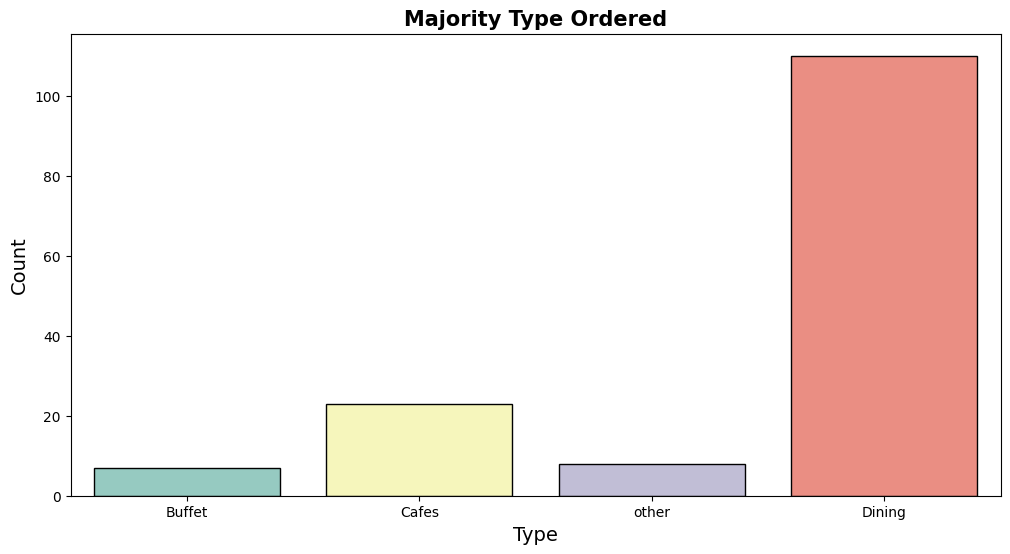

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="listed_in(type)", palette="Set3",edgecolor="black")
plt.xlabel("Type", fontdict={'fontsize': 14})
plt.ylabel("Count", fontdict={'fontsize': 14})
plt.title("Majority Type Ordered", fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.show()

### 2. How many votes has each type of restaurant received from customers?

In [27]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [48]:
grouped_df=df.groupby("listed_in(type)")["votes"].sum().reset_index()
grouped_df

,listed_in(type),votes
0,Buffet,3028
1,Cafes,6434
2,Dining,20363
3,other,9367


C:\Users\SPPL IT\AppData\Local\Temp\ipykernel_15216\2095873445.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_df,x="listed_in(type)",y='votes', palette="Set3",edgecolor="black")


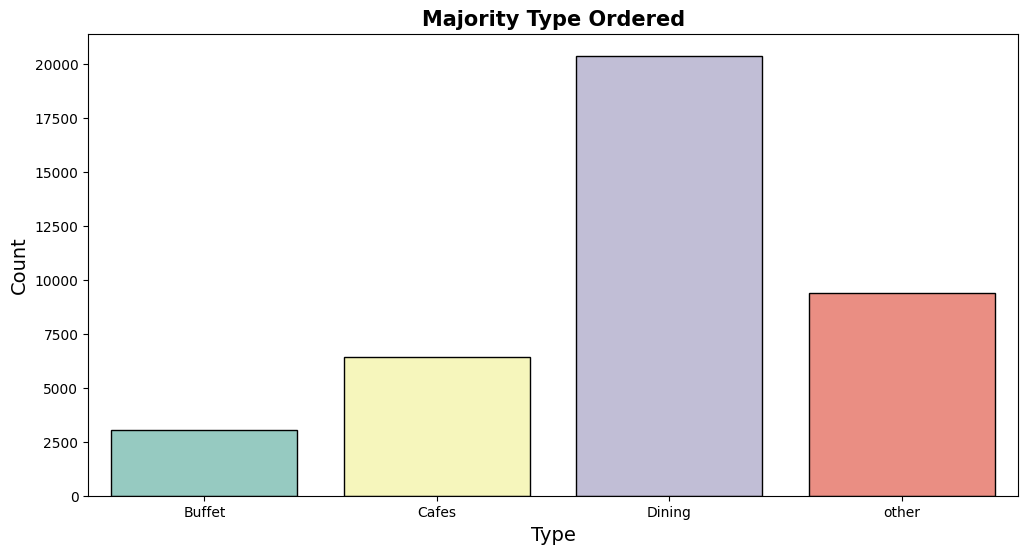

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(data=grouped_df,x="listed_in(type)",y='votes', palette="Set3",edgecolor="black")
plt.xlabel("Type", fontdict={'fontsize': 14})
plt.ylabel("Count", fontdict={'fontsize': 14})
plt.title("Majority Type Ordered", fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.show()

In [68]:
fig = px.line(grouped_df, x="listed_in(type)", y='votes', title="Votes by Type",hover_name = "listed_in(type)",
              hover_data={"listed_in(type)": False, "votes": True})

# Update the trace to add markers
fig.update_traces(textposition = 'top center',mode='lines+markers', marker=dict(symbol='circle', size=10))

fig.update_layout(
    title_text='Votes By Type',
    xaxis_title='Type',
    yaxis_title='Votes',
    xaxis=dict(
        title_font=dict(size=18, family='Arial', color='black', weight='bold')
    ),
    yaxis=dict(
        title_font=dict(size=18, family='Arial', color='black', weight='bold')
    )
)
fig.show()

### 3. What are the ratings that the majority of the restaurants have received?

In [114]:
df_sorted=df["rate"].sort_values().reset_index()

(array([19., 50., 55., 24.]),
 array([ 0.  ,  4.75,  9.5 , 14.25, 19.  ]),
 <BarContainer object of 4 artists>)

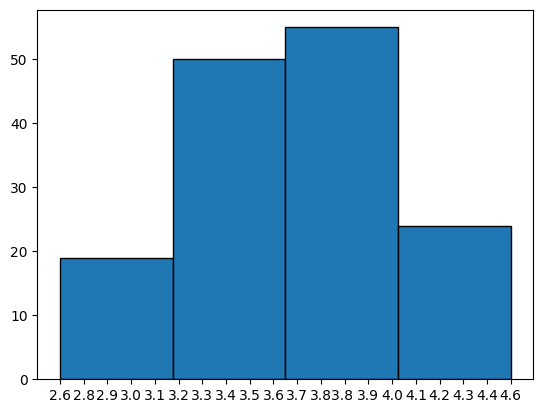

In [115]:
plt.hist(data=df_sorted, x = "rate",bins=4 , edgecolor= "black")   

<Axes: xlabel='rate', ylabel='Count'>

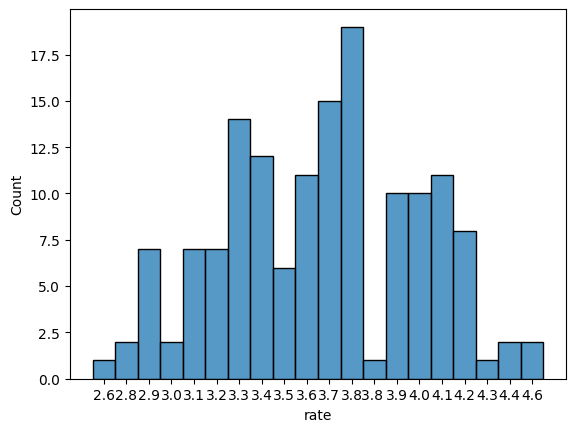

In [118]:
sns.histplot(data=df_sorted, x = "rate")              

In [121]:
# Plot the make of the car and its location
fig = px.histogram(df_sorted, x = "rate",
                  title = "Ratings Count")
                  
fig.show()

### 4. Zomato has observed that most couples order most of their food online, what is their avg spending on each other?

In [122]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [125]:
df_online= df.groupby("online_order")["approx_cost(for two people)"].sum().reset_index()

df_online

,online_order,approx_cost(for two people)
0,No,32300
1,Yes,29600


In [142]:
positive=df_online[df_online["online_order"]== "Yes"]

(positive["approx_cost(for two people)"])//(len(df["approx_cost(for two people)"]))
    

1    200
Name: approx_cost(for two people), dtype: int64

<Axes: xlabel='online_order', ylabel='approx_cost(for two people)'>

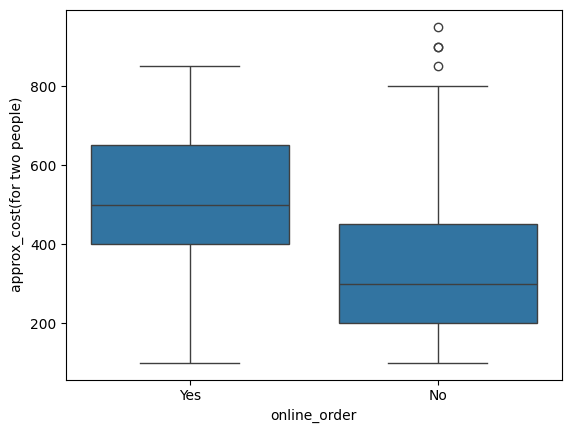

In [163]:
sns.boxplot(data=df , x="online_order",y="approx_cost(for two people)")

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

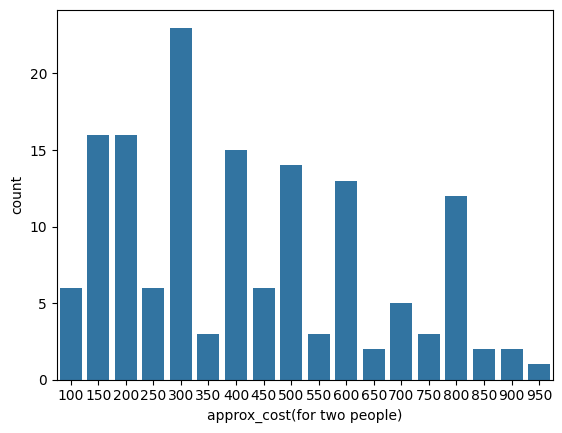

In [144]:
sns.countplot(data=df,x="approx_cost(for two people)")

### 5. Which mode (Online Or Offline) has received the maximum rating ?

In [145]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

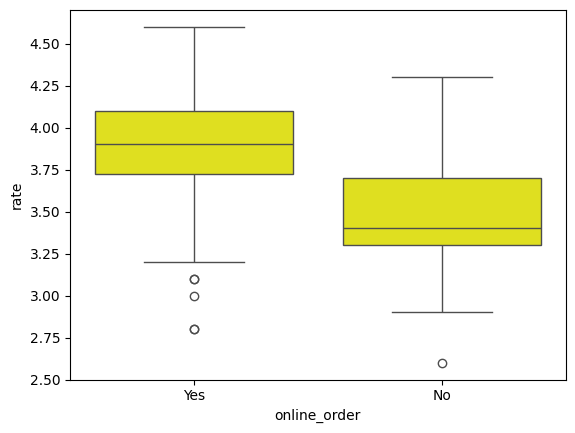

In [156]:
sns.boxplot(data=df , x="online_order",y="rate", color= "yellow")

### 6. Which type of restaurant received more offline orders ?

In [164]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='listed_in(type)', ylabel='count'>

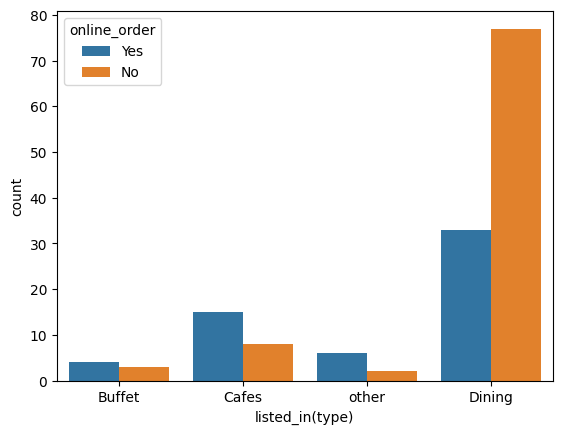

In [169]:
sns.countplot(data=df,x="listed_in(type)",hue="online_order" )

In [177]:
pivot_table=df.pivot_table(index="listed_in(type)",columns="online_order",aggfunc="size",fill_value=0)
pivot_table

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


<Axes: xlabel='online_order', ylabel='listed_in(type)'>

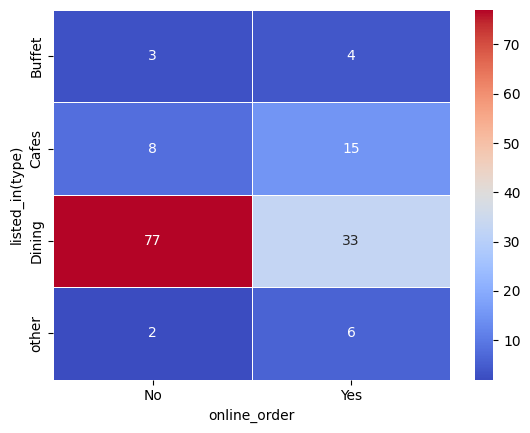

In [173]:
sns.heatmap(pivot_table,linewidths= 0.5,cmap='coolwarm', annot = True)

In [174]:
fig = px.imshow(pivot_table) ## For Heatmap
fig.show()